## Introduction
<details>
<summary>Details :</summary>

Name : Nikita Bhure

Batch : 10

Program : Data Science with Python By SkillAcademy

Assignment : Data Science Capstone Project - Propensify (Propensity Model to identify how likely certain target groups customers
respond to the marketing campaign)

</details>

## Capstone Project (Propensify)

---

<details>
<summary>Steps Involved in Machine Learning Projects</summary>

1. Understanding the Problem Statement.

2. Data Collection (from resource provided).

3. Data Exploration and Analysis.

4. Data Preprocessing.

5. Feature Engineering.

6. Model Selection.

7. Model Training and Evaluation.

8. Model Interpretability.

9. Documentation.

10. Data Visualization.

11. Model Deployment.

</details>

### 1. Understanding the Problem & Dataset

Are you aware of what, when, and why your customers will make a purchase? Many businesses undertake an intense pursuit to discover these answers, dedicating valuable resources to datadriven campaigns and high-cost strategies - yet the actual outcomes often remain elusive and disappointing. Customer information is considered to be a valuable asset, however its true worth can only be established when it is used. Many companies have large collections of data that appear to be impressive, but upon further examination, they may contain outdated or unimportant information.
Propensity modeling is a method that aims to forecast the chance that individuals, leads, and customers will engage in specific actions. This method uses statistical analysis which takes into account all the independent and confounding factors that impact customer behavior. Suppose you are working for a company as a Data Scientist. Your company is commissioned by
an insurance company to develop a tool to optimize their marketing efforts. This project is aimed at building a propensity model to identify potential customers.

####
<details>
<summary>About Dataset</summary>

This dataset contains information about the customers and their response toward ads-campaigns.

The columns in the given dataset are as follows:

1. custAge            : Age of the customer (in years)
2. profession         : Type of job
3. marital            : Marital status
4. schooling          : Education level
5. default            : Has a previous default account?
6. housing            : Has a housing loan
7. loan               : Has a personal loan?
8. contact            : Preferred contact type
9. month              : Last contact month
10. day_of_week       : Last contact day of week
11. campaign          : Number of time the customer was contacted
12. pdays             : Number of days that passed by after the client was contacted from a previous campaign (numeric; 999 means client was not previously contacted)
12. previous          : Number of contacts performed before this campaign and for this client
12. poutcome          : Outcome of the previous marketing campaign
12. emp.var.rate      : Employment variation rate - quaterly indicator
12. cons.price.id     : Consumer price index - monthly indicator
12. cons.conf.idx     : Consumer confidence index - monthly indicator
12. euribor3m         : Euribor 3 month rate - daily indicator
12. nr.employed       : Number of employees - quaterly indicator
12. pmonths           : Number of months passed after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) 
12. pastEmail         : Number of previous emails sent to this client
12. **responded**     : **Did the customer respond to the marketing campaign and purchase a policy?**
</details>

### 2. Module Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

import joblib

### 3. Load the data

In [2]:
df = pd.read_csv("../data/raw/train.csv")

### 4. Exploratory Data Analysis (EDA)

In [3]:
# Basic information
# print(df.head())
print(df.info())
# print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8240 entries, 0 to 8239
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         6224 non-null   float64
 1   profession      8238 non-null   object 
 2   marital         8238 non-null   object 
 3   schooling       5832 non-null   object 
 4   default         8238 non-null   object 
 5   housing         8238 non-null   object 
 6   loan            8238 non-null   object 
 7   contact         8238 non-null   object 
 8   month           8238 non-null   object 
 9   day_of_week     7451 non-null   object 
 10  campaign        8238 non-null   float64
 11  pdays           8238 non-null   float64
 12  previous        8238 non-null   float64
 13  poutcome        8238 non-null   object 
 14  emp.var.rate    8238 non-null   float64
 15  cons.price.idx  8238 non-null   float64
 16  cons.conf.idx   8238 non-null   float64
 17  euribor3m       8238 non-null   f

In [4]:
# Check for missing values
print(df.isnull().sum())

custAge           2016
profession           2
marital              2
schooling         2408
default              2
housing              2
loan                 2
contact              2
month                2
day_of_week        789
campaign             2
pdays                2
previous             2
poutcome             2
emp.var.rate         2
cons.price.idx       2
cons.conf.idx        2
euribor3m            2
nr.employed          2
pmonths              2
pastEmail            2
responded            2
profit            7310
id                   2
dtype: int64


In [5]:
df.columns.tolist()

['custAge',
 'profession',
 'marital',
 'schooling',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'pmonths',
 'pastEmail',
 'responded',
 'profit',
 'id']

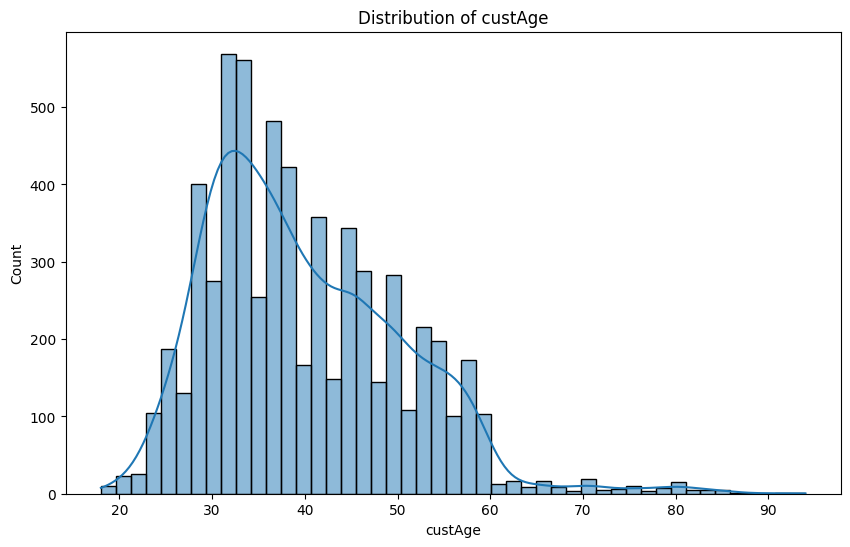

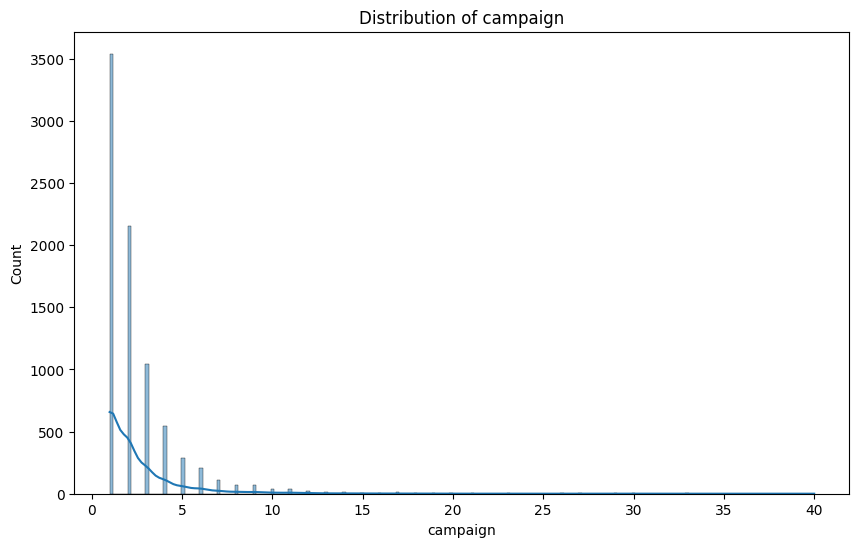

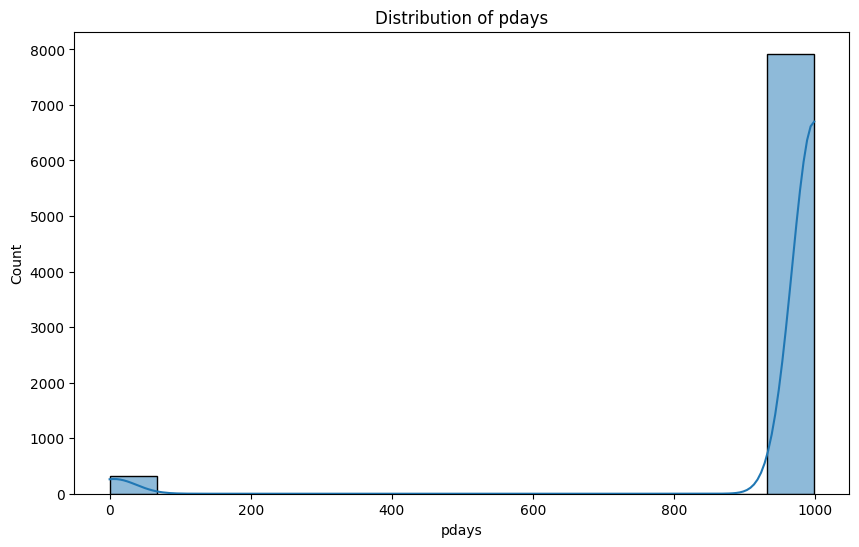

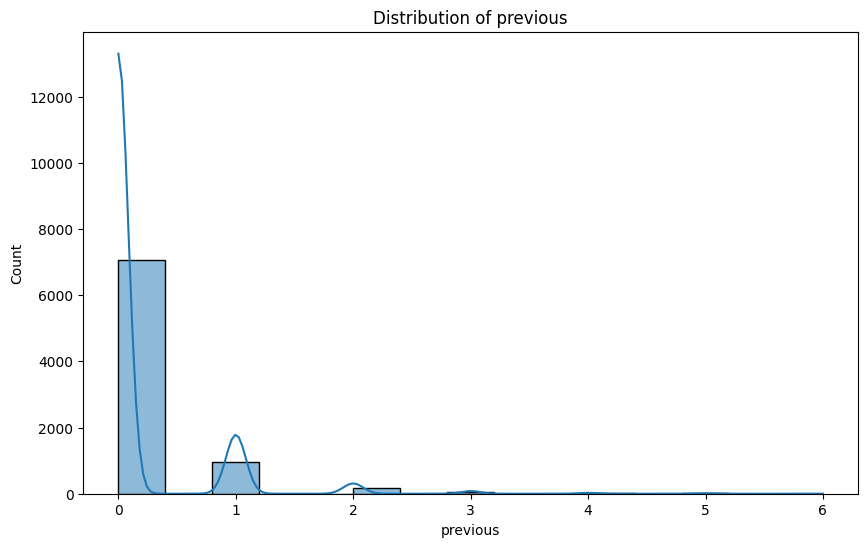

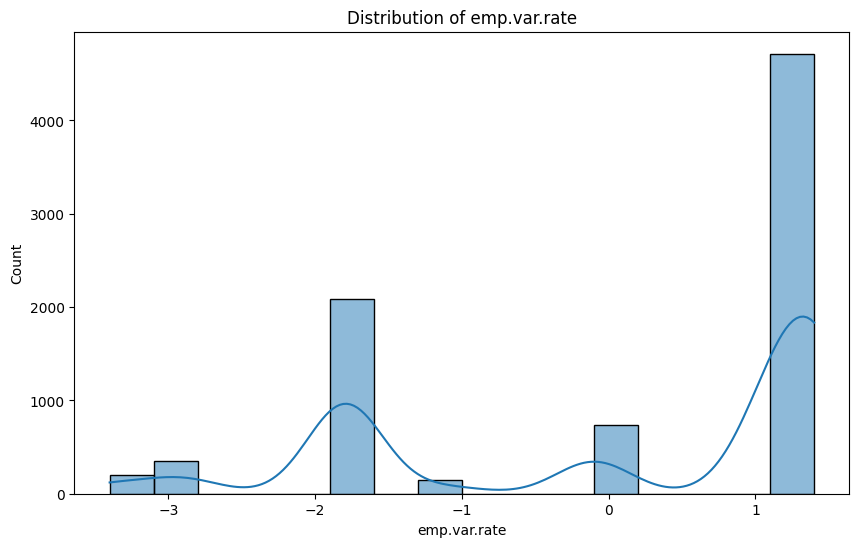

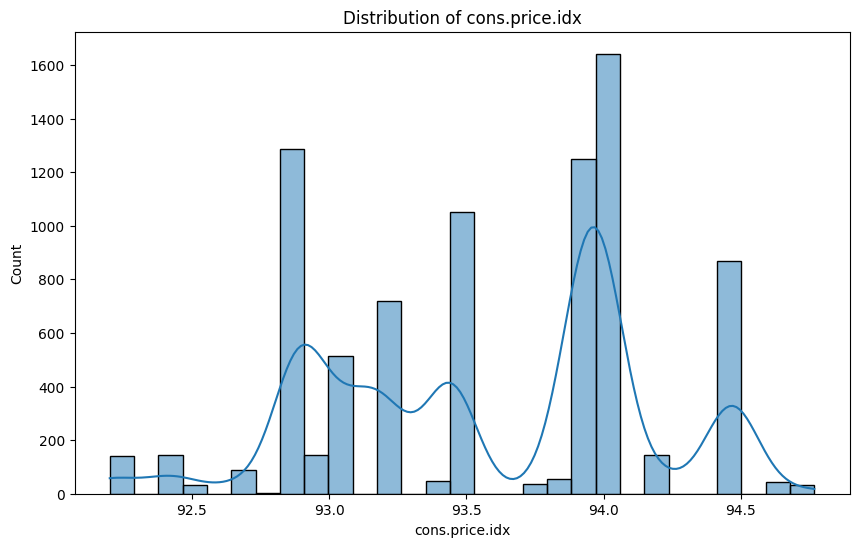

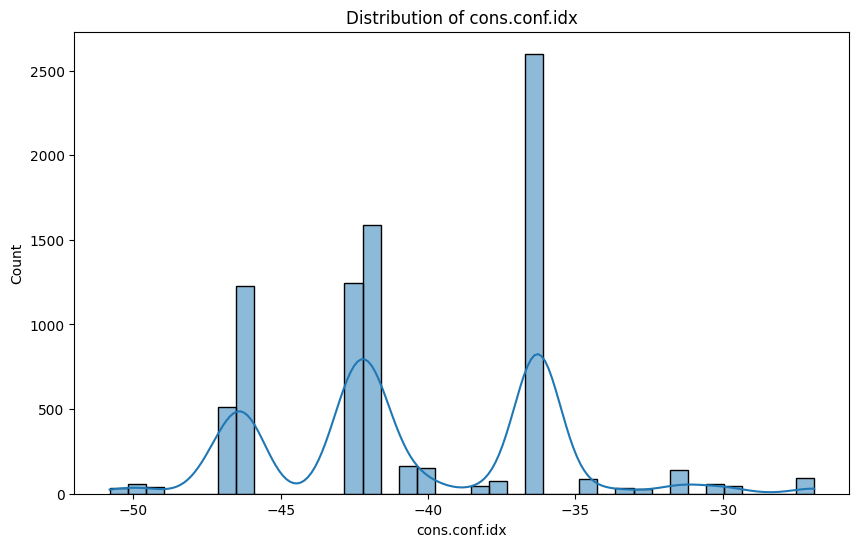

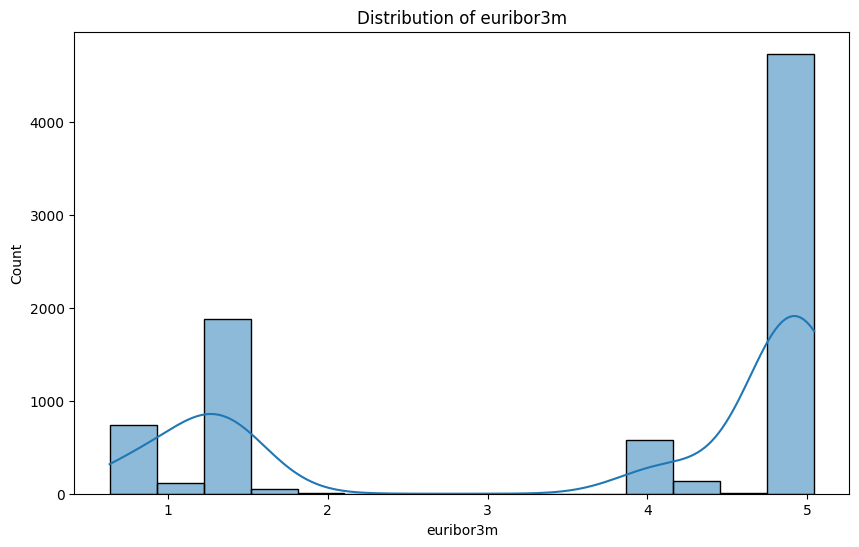

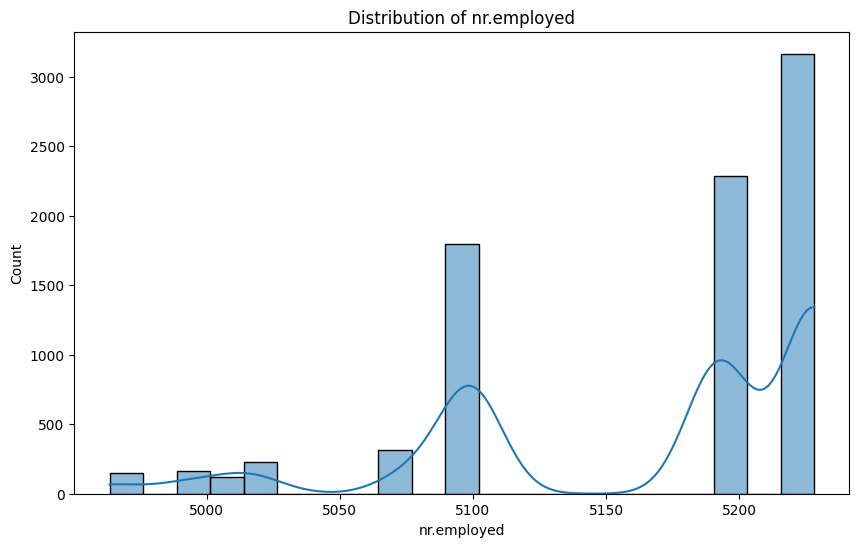

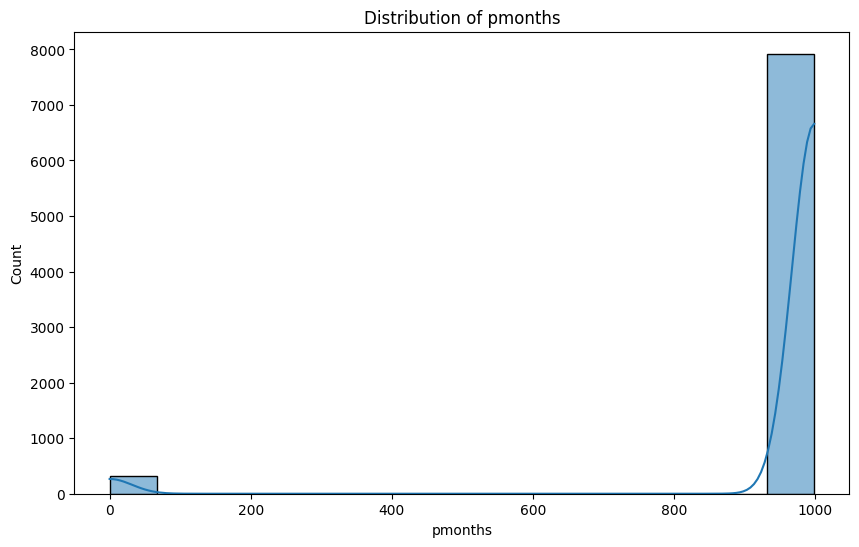

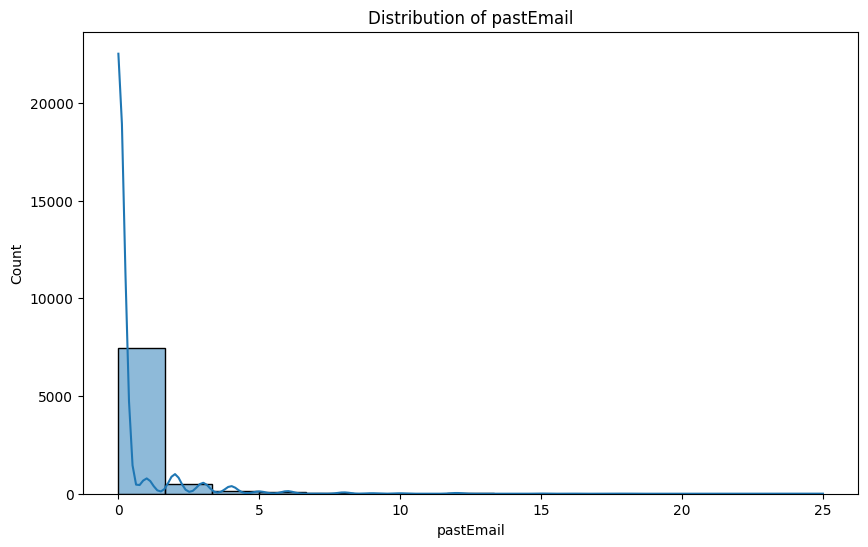

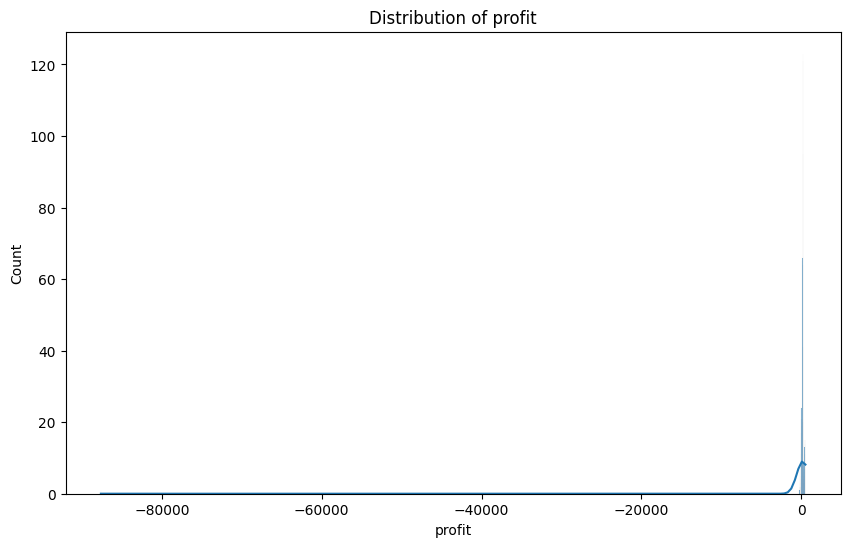

In [6]:
# Visualize numerical features
numerical_features = ['custAge', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail', 'profit']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

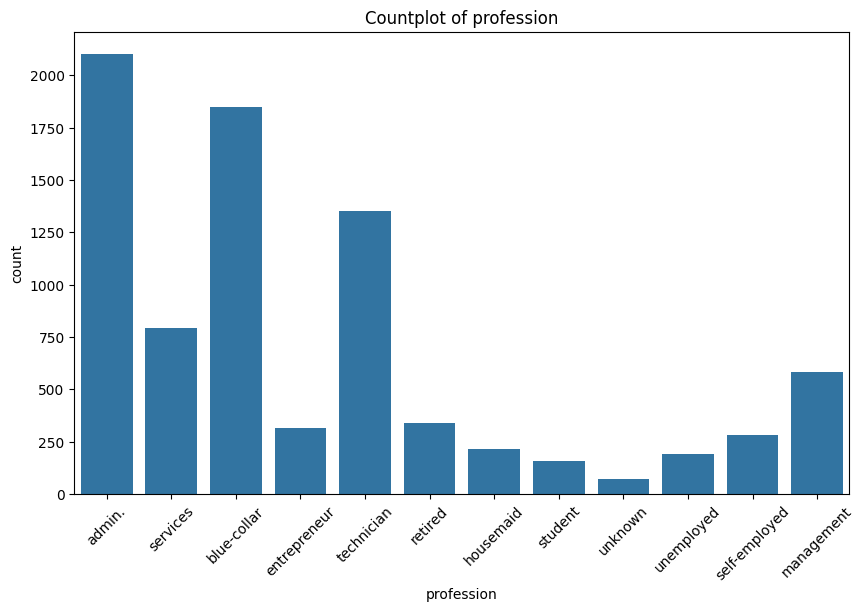

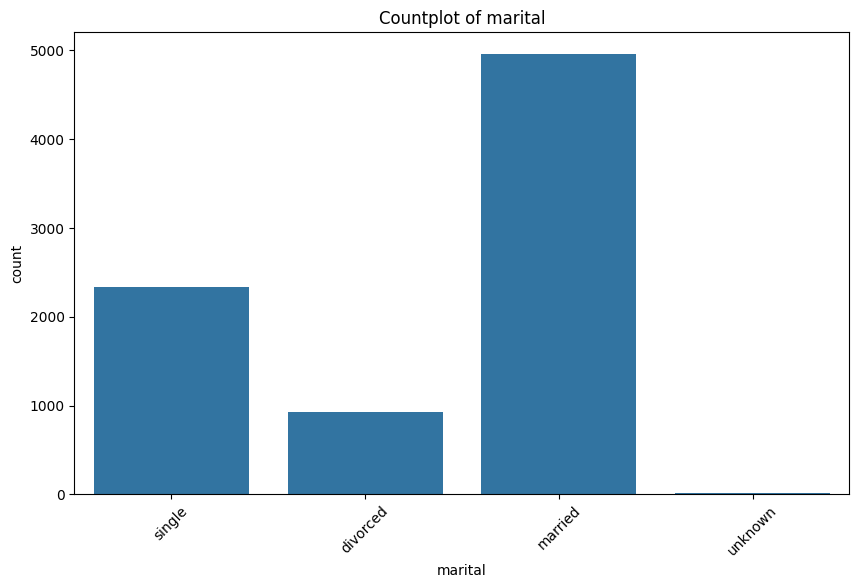

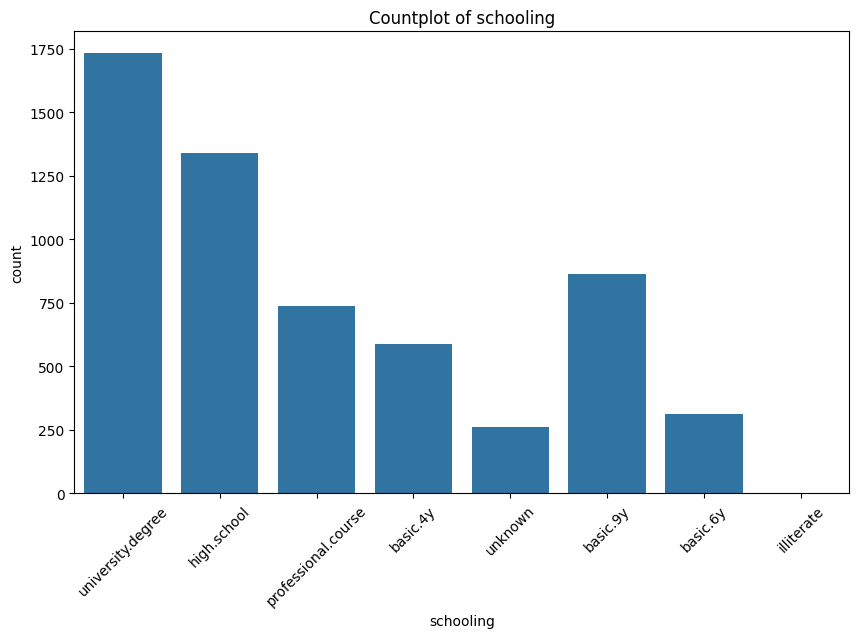

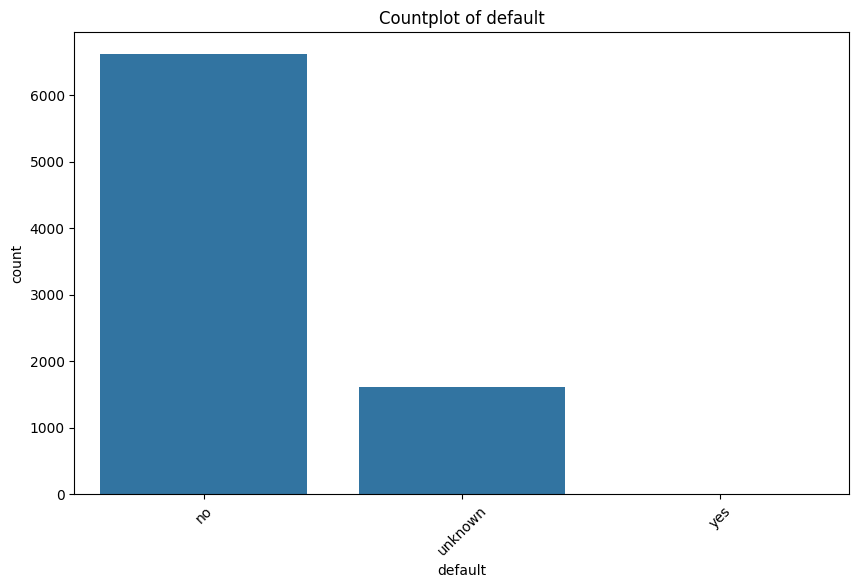

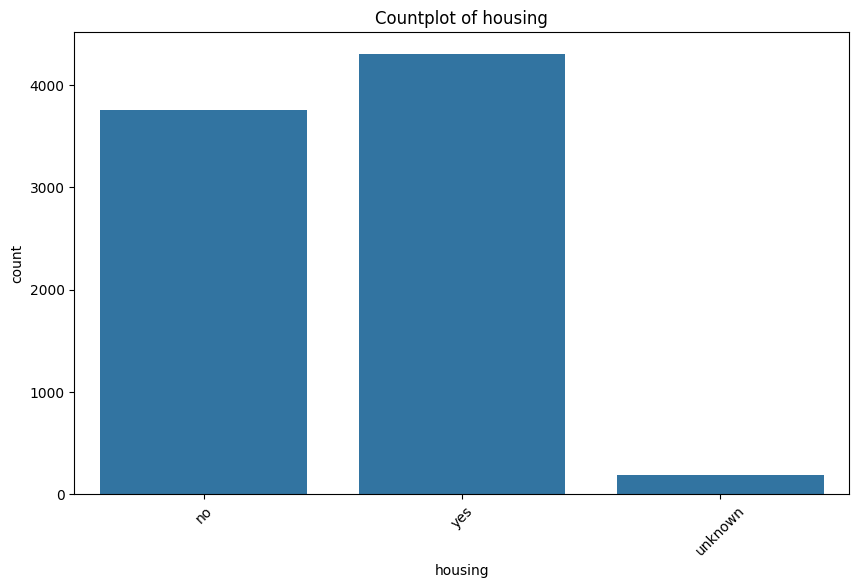

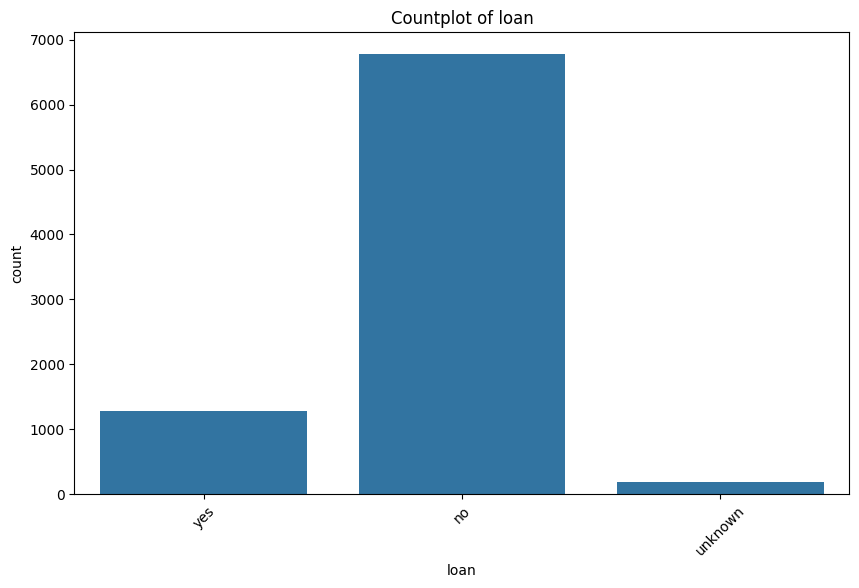

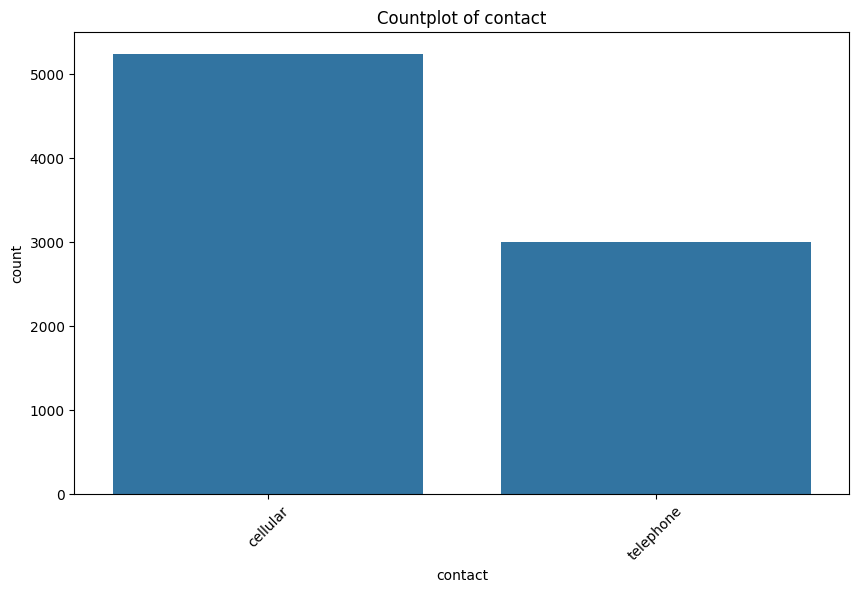

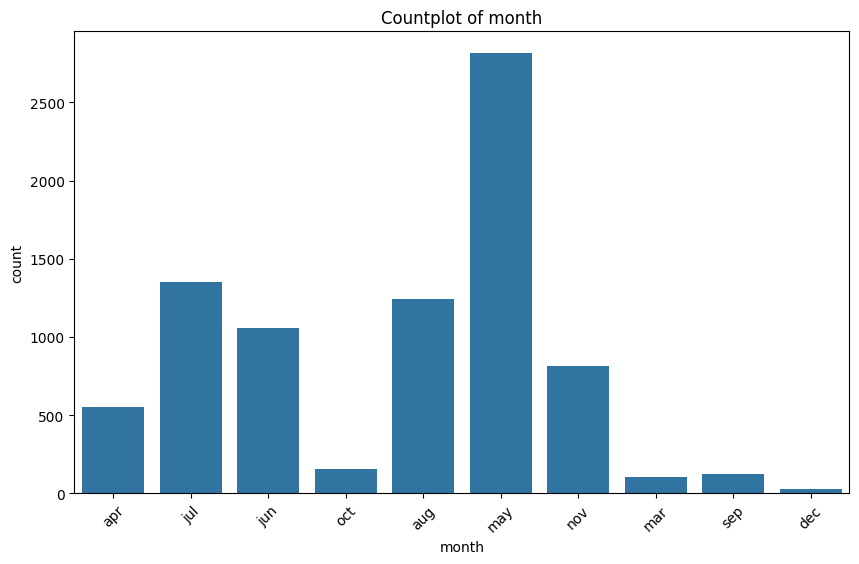

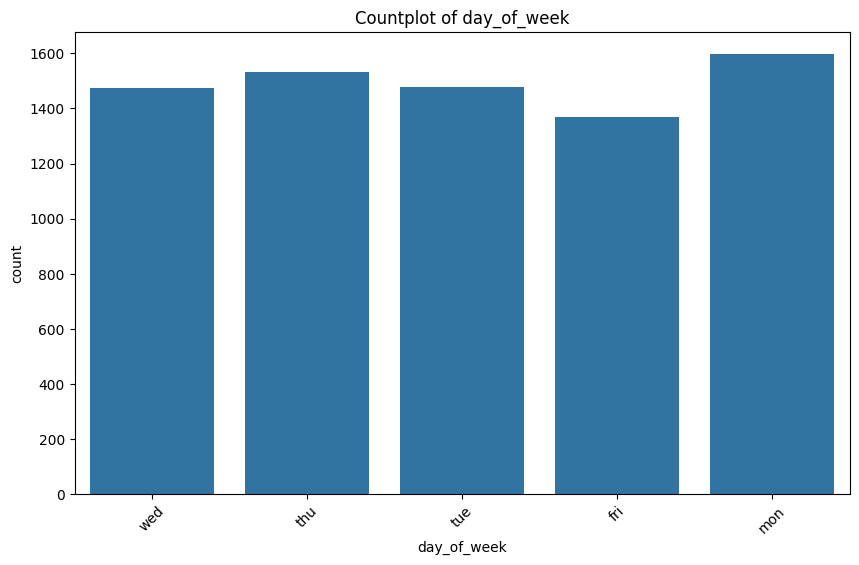

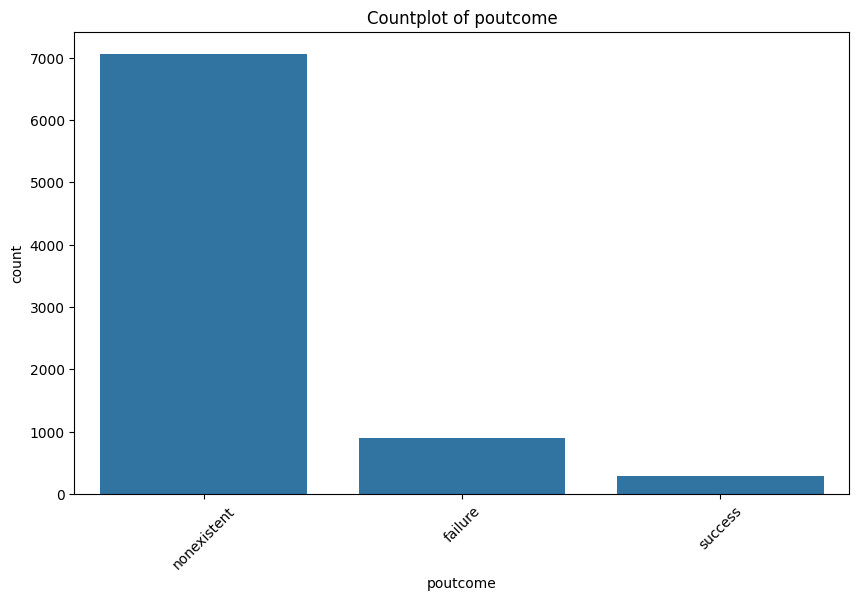

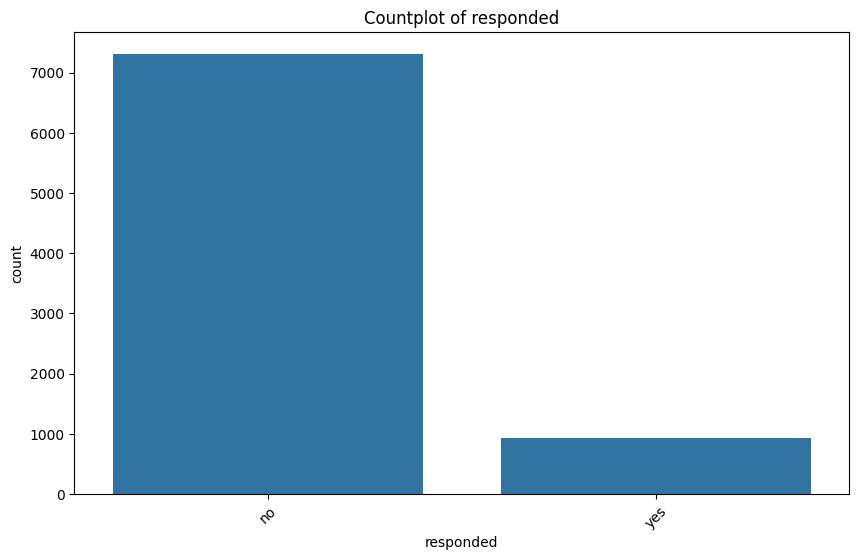

In [7]:
# Visualize categorical features
categorical_features = ['profession', 'marital', 'schooling', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'responded']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Countplot of {feature}')
    plt.xticks(rotation=45)
    plt.show()

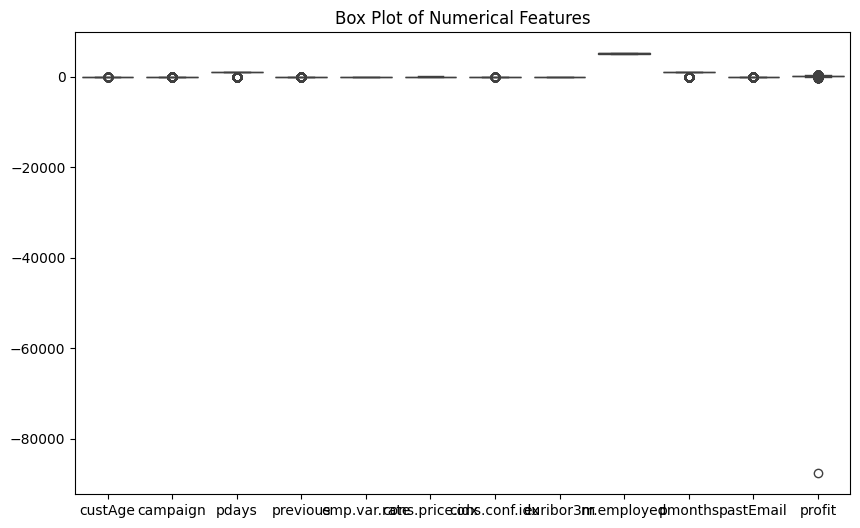

In [8]:
# Check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_features])
plt.title('Box Plot of Numerical Features')
plt.show()

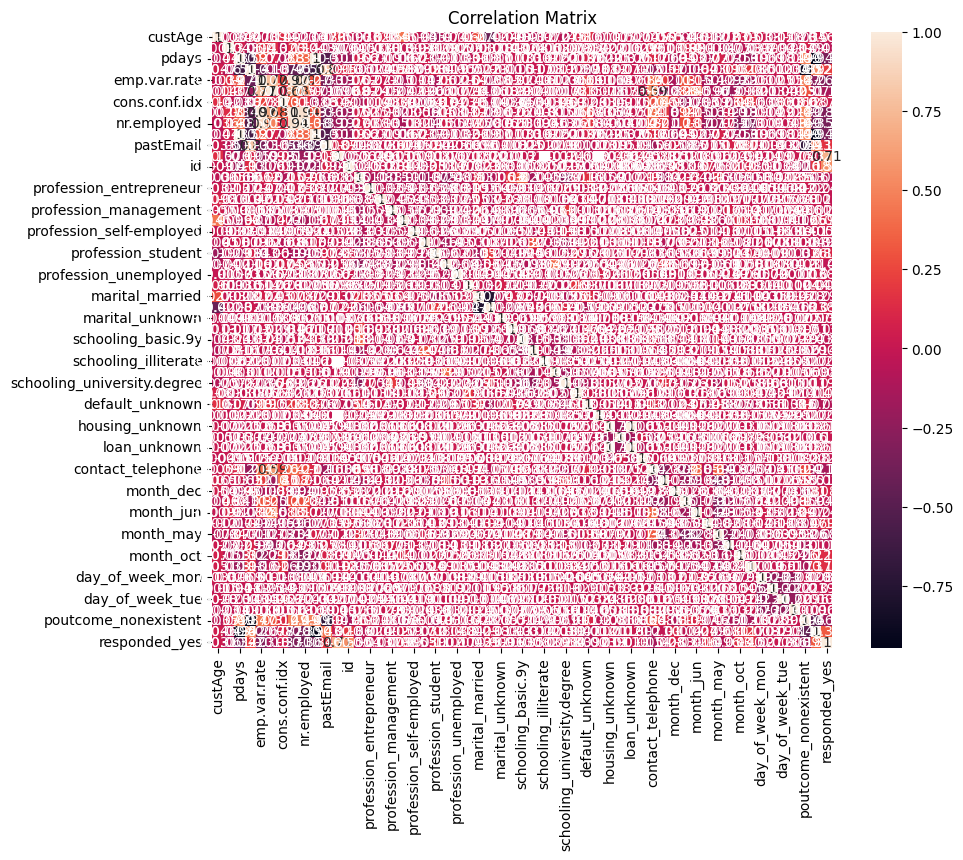

In [9]:
# Check for correlations
df_new = pd.get_dummies(df, columns=categorical_features, drop_first=True)
corr_matrix = df_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

### 5. Data Preprocessing

In [10]:
# Data cleaning
df.dropna(subset=['responded', 'schooling', 'day_of_week'], inplace=True)
df['custAge'].fillna(df['custAge'].mean(), inplace=True)
df = df.drop(['profit', 'id'], axis=1)

# print(df.info())
print(df.isnull().sum())

custAge           0
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
responded         0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20504\2046345538.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['custAge'].fillna(df['custAge'].mean(), inplace=True)


In [11]:
# Encode categorical features
categorical_features = ['profession', 'marital', 'schooling', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'responded']
for feature in categorical_features:
    df[feature] = LabelEncoder().fit_transform(df[feature])

In [12]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = ['custAge', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [13]:
# Split the data into features and target variable
X = df.drop('responded', axis=1)
y = df['responded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sm = SMOTE(random_state=42)
print(X_train.isnull().sum())
print(y_train.isnull().sum())
print(X_test.isnull().sum())
print(y_test.isnull().sum())
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

C:\Users\Lenovo\OneDrive\Desktop\Data Science Project\venv\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\Lenovo\OneDrive\Desktop\Data Science Project\venv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


custAge           0
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
dtype: int64
0
custAge           0
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
dtype: int64
0
Accuracy: 0.8784425451092118
Classification Report:
               precision    recall  f1-score   support

           0       0.9